## Submetric: Fire Incidents   
The metric that I am measuring is the number of fire incidents that occur in each neighborhood. This will help relate to our group metric on safety which we are using to measure the best neighborhood.  
A truly "safe" neighborhood must offer security against various risks, and fire incidents represent a significant threat to life and property.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data Cleaning
The first step was to standardize the data so it could be compared and utilzed much simpler.

In [2]:
# Load the Data
fire_incidents = pd.read_csv("FireIncidents.csv")

# Remove fire incident entries that do not have a neighborhood listed
fire_incidents['neighborhood'] = fire_incidents['neighborhood'].str.strip()
fire_incidents = fire_incidents.replace(['NA', ''], np.nan,)
fire_incidents = fire_incidents.dropna(subset=['neighborhood'])
fire_incidents

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,22474,F250077015,142.0,Brush or brush-and-grass mixture fire,"600 BLOCK COMMONWEALTH PL, PITTSBURGH PA",0,2025-08-05T16:52:24,231EN03,201.0,Central Business District,6.0,2.0,4.200302e+10,6.0,2.0,2.0,1-3,40.441741,-80.006409
10726,22507,F250078537,111.0,Building fire,"1200 BLOCK PEMBERTON ST, PITTSBURGH PA",1,2025-08-10T01:43:52,231EN35,2708.0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.482837,-80.032919
10727,22540,F250077528,140.0,"Natural vegetation fire, Other","3500 BLOCK TERRACE ST, PITTSBURGH PA",0,2025-08-07T07:11:02,231EN10,402.0,West Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-10,40.442023,-79.962057
10728,22541,F250078638,142.0,Brush or brush-and-grass mixture fire,"5100 BLOCK HILLCREST ST, PITTSBURGH PA",0,2025-08-10T11:51:50,231EN08,1016.0,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,40.468741,-79.942021


# Displaying Fire Incidents
Now lets take a look at the number of fire incidents by neighborhood

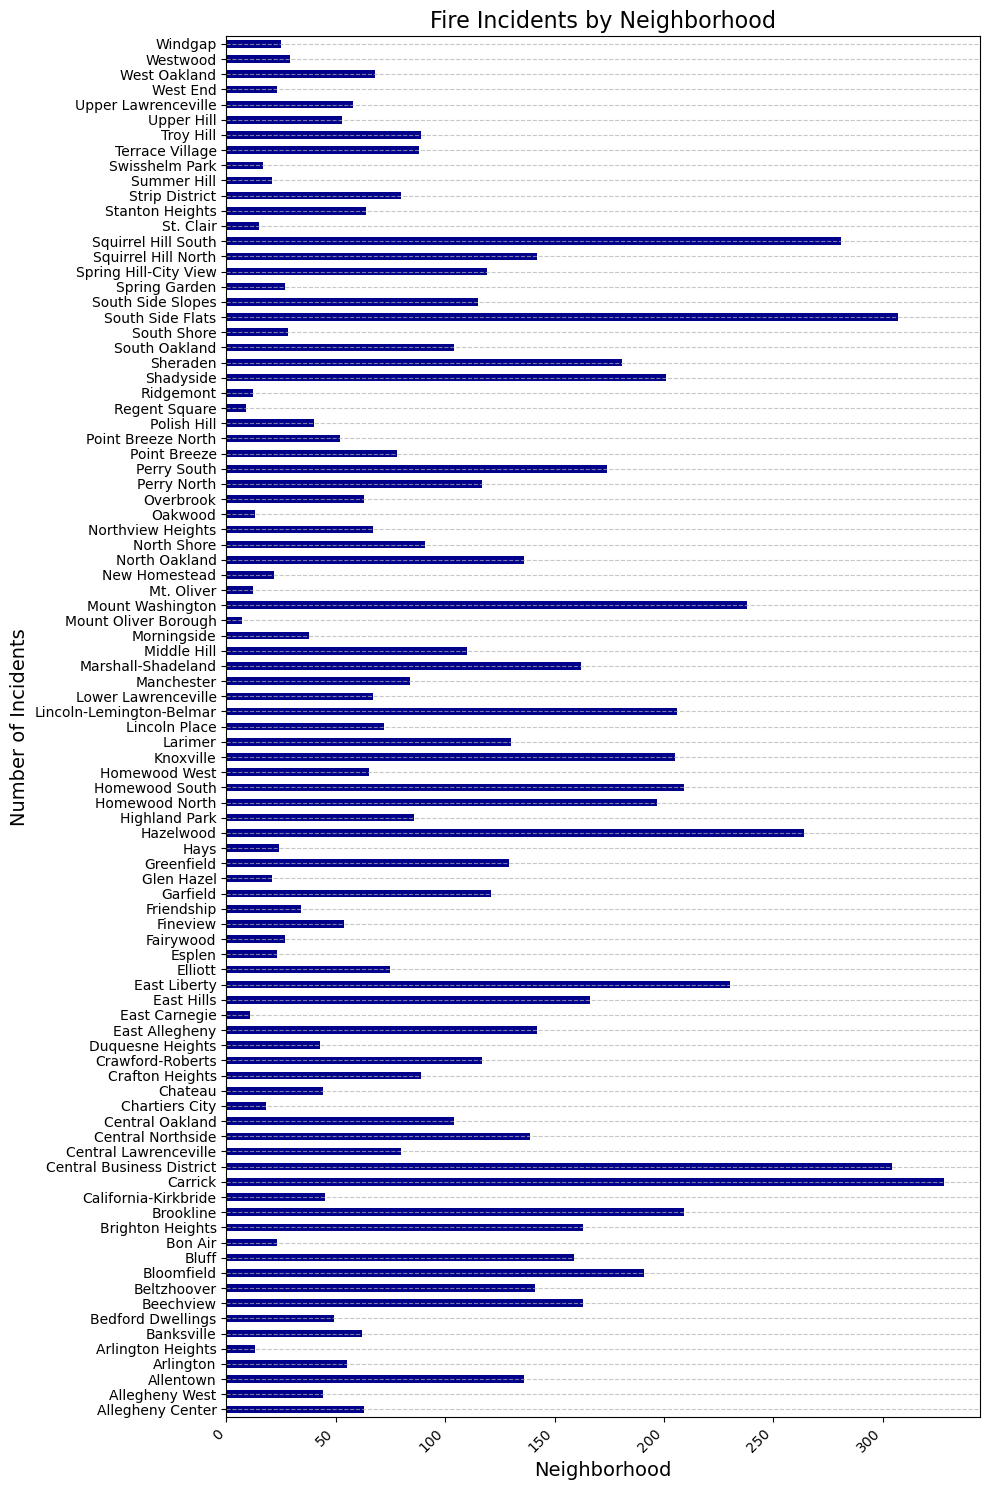

In [3]:
# Obtain the counts for the fire incidents in each neighborhood
neighborhood_incidents = fire_incidents['neighborhood'].value_counts().sort_index()

plt.figure(figsize=(10, 15))

# Create the horizontal bar plot
neighborhood_incidents.plot(kind='barh', color='darkblue')
plt.title('Fire Incidents by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

plt.xticks(rotation=45, ha = "right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

There is a lot of data here! Lets grab the five neighborhoods with the least amount of fire incidents.

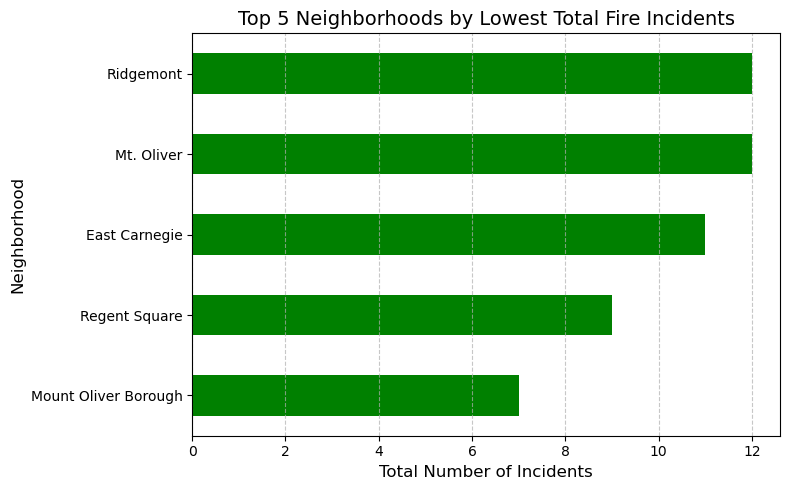

In [4]:
# Sort the incidents by the neighborhoods with the least
top_five_neighborhoods = neighborhood_incidents.sort_values().head(5)

plt.figure(figsize=(8, 5))

# Plot the 5 neighborhoods with the least amount of fire incidents
top_five_neighborhoods.plot(kind='barh', color='green')

plt.title('Top 5 Neighborhoods by Lowest Total Fire Incidents', fontsize=14)
plt.xlabel('Total Number of Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusion??
So does this mean that Mount Oliver Borough is the safest neigborhood to live in to avoid fires since it has the least number of incidents? Not necessarily. A raw count of incidents is misleading because it doesn't account for population size or neighborhood density.  
For example, A neighborhood with only 500 residents will naturally have fewer total incidents than a neighborhood with 10,000 residents, even if the risk to an individual resident in the smaller neighborhood is actually much higher.  
  
To find the true "safest" neighborhood, we must standardize the data by population, and find the incident rate

---

***


***


# Formula 
To calculate the actual neighborhood that is the safest from fire incidents, we are going to calculate rate of fire incidents per 1000 people living in the neighborhood. 
$$\text{Rate per 1,000 people} = \frac{\text{Fire Incidents}}{\text{Population}} \times 1000$$

Let's import the population census of Pittsburgh from 2020

In [24]:
# Load the census data
pop_data = pd.read_csv("Census.csv")

# Only keep necessary columns
pop_data = pop_data[["Neighborhood", "2020_Total_Population"]]

# Count the fire incidents in each neighborhood
incident_counts = fire_incidents['neighborhood'].value_counts().reset_index()
incident_counts.columns = ['Neighborhood', 'Total_Incidents']

# Create a new dataframe by merging the population data and incident counts
merged_data = pd.merge(incident_counts, pop_data, on='Neighborhood', how='inner')


merged_data

,Neighborhood,Total_Incidents,2020_Total_Population
0,Carrick,328,10290
1,South Side Flats,307,7467
2,Squirrel Hill South,281,15317
3,Hazelwood,264,3889
4,Mount Washington,238,8710
...,...,...,...
81,Oakwood,13,1025
82,Ridgemont,12,390
83,Mt. Oliver,12,443
84,East Carnegie,11,491


In [6]:
# Calculate the Rate per 1,000 people
merged_data['Rate_Per_1000_Residents'] = (merged_data['Total_Incidents'] / merged_data['2020_Total_Population']) * 1000
merged_data

,Neighborhood,Total_Incidents,2020_Total_Population,Rate_Per_1000_Residents
0,Carrick,328,10290,31.875607
1,South Side Flats,307,7467,41.114236
2,Squirrel Hill South,281,15317,18.345629
3,Hazelwood,264,3889,67.883775
4,Mount Washington,238,8710,27.324914
...,...,...,...,...
81,Oakwood,13,1025,12.682927
82,Ridgemont,12,390,30.769231
83,Mt. Oliver,12,443,27.088036
84,East Carnegie,11,491,22.403259


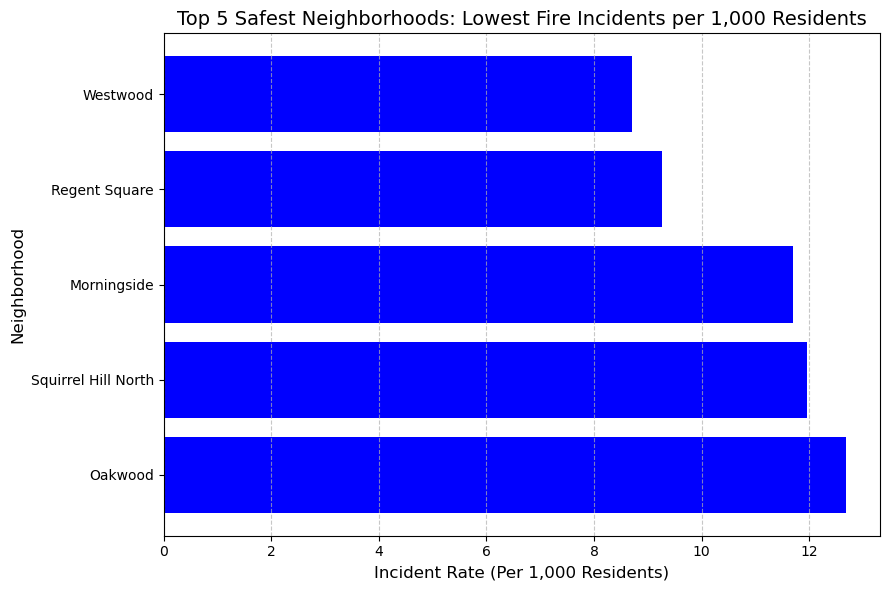

In [19]:
top_five_rate = merged_data.sort_values(by='Rate_Per_1000_Residents').head(5)

# Round the rates to make the data cleaner
top_five_rate['Rate_Per_1000_Residents'] = top_five_rate['Rate_Per_1000_Residents'].round(2)

plt.figure(figsize=(9, 6))
# Plot the Rate_Per_1000_Residents
plt.barh(top_five_rate['Neighborhood'], top_five_rate['Rate_Per_1000_Residents'], color='blue')

plt.title('Top 5 Safest Neighborhoods: Lowest Fire Incidents per 1,000 Residents', fontsize=14)
plt.xlabel('Incident Rate (Per 1,000 Residents)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 5 safest neighborhoods by fire incidents
1. Westwood
2. Regent Square
3. Morningside
4. Squirrel Hill North
5. Oakwood

# Conclusion
Westwood wins the title for being the neighborhood with the lowest amount of fire incidents by rate (About 8 fire incidents per 1,000 residents). Regent square is not too far behind either. This makes sense because Westwood is a very suburban community with single-family homes which lowers the risk factors compared to neighborhoods that have dense-connected units and more industrial structures.  

In my opinion though, the strip district is the best neighborhood just cause of the amount of stuff you can do there. Going out with friends and visiting all the places in the strip district is an awesome plan for any weekend